# Clasificación - Taller Calidad del Agua

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import random

In [3]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix as plt_cm

In [4]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score, precision_score

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.svm import SVC

In [10]:
from sklearn.neighbors import KNeighborsClassifier

## Importar la data

In [11]:
ruta = './Datasets/Agua/water_potability.csv'
agua = pd.read_csv(ruta, encoding='utf-8')

## Conocer la data

In [12]:
agua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
agua.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

## Verificar si hay datos nulos

In [14]:
agua.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Gráfica 1

Representación gráfica de los datos nulos dentro del dataset

<AxesSubplot:>

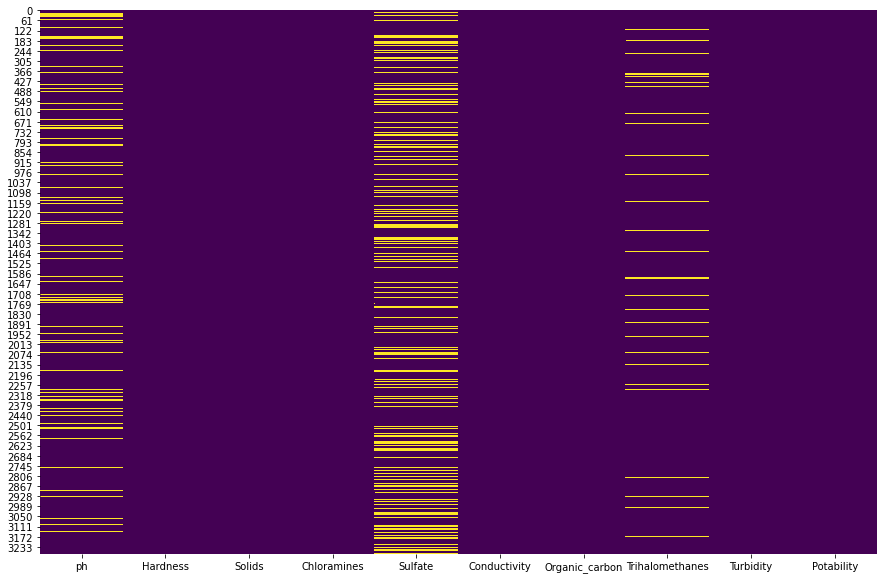

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(agua.isna(), cbar=False, cmap='viridis')

In [16]:
print(f"El porcentaje de nulos de la columna ph es: {agua['ph'].isnull().sum() / agua.shape[0] * 100}%")

El porcentaje de nulos de la columna ph es: 14.987789987789988%


In [17]:
print(f"El porcentaje de nulos de la columna Sulfate es: {agua['Sulfate'].isnull().sum() / agua.shape[0] * 100}%")

El porcentaje de nulos de la columna Sulfate es: 23.84004884004884%


In [18]:
print(f"El porcentaje de nulos de la columna Trihalomethanes es: {agua['Trihalomethanes'].isnull().sum() / agua.shape[0] * 100}%")

El porcentaje de nulos de la columna Trihalomethanes es: 4.945054945054945%


A partir del procentaje de datos nulos puedo decidir que tratamiento aplico en los datos y que afectación presentara dicha decisión.

## Graficar la data

### Gráfica 2

Relación entre los datos y tomando en cuenta su estado de potabilidad

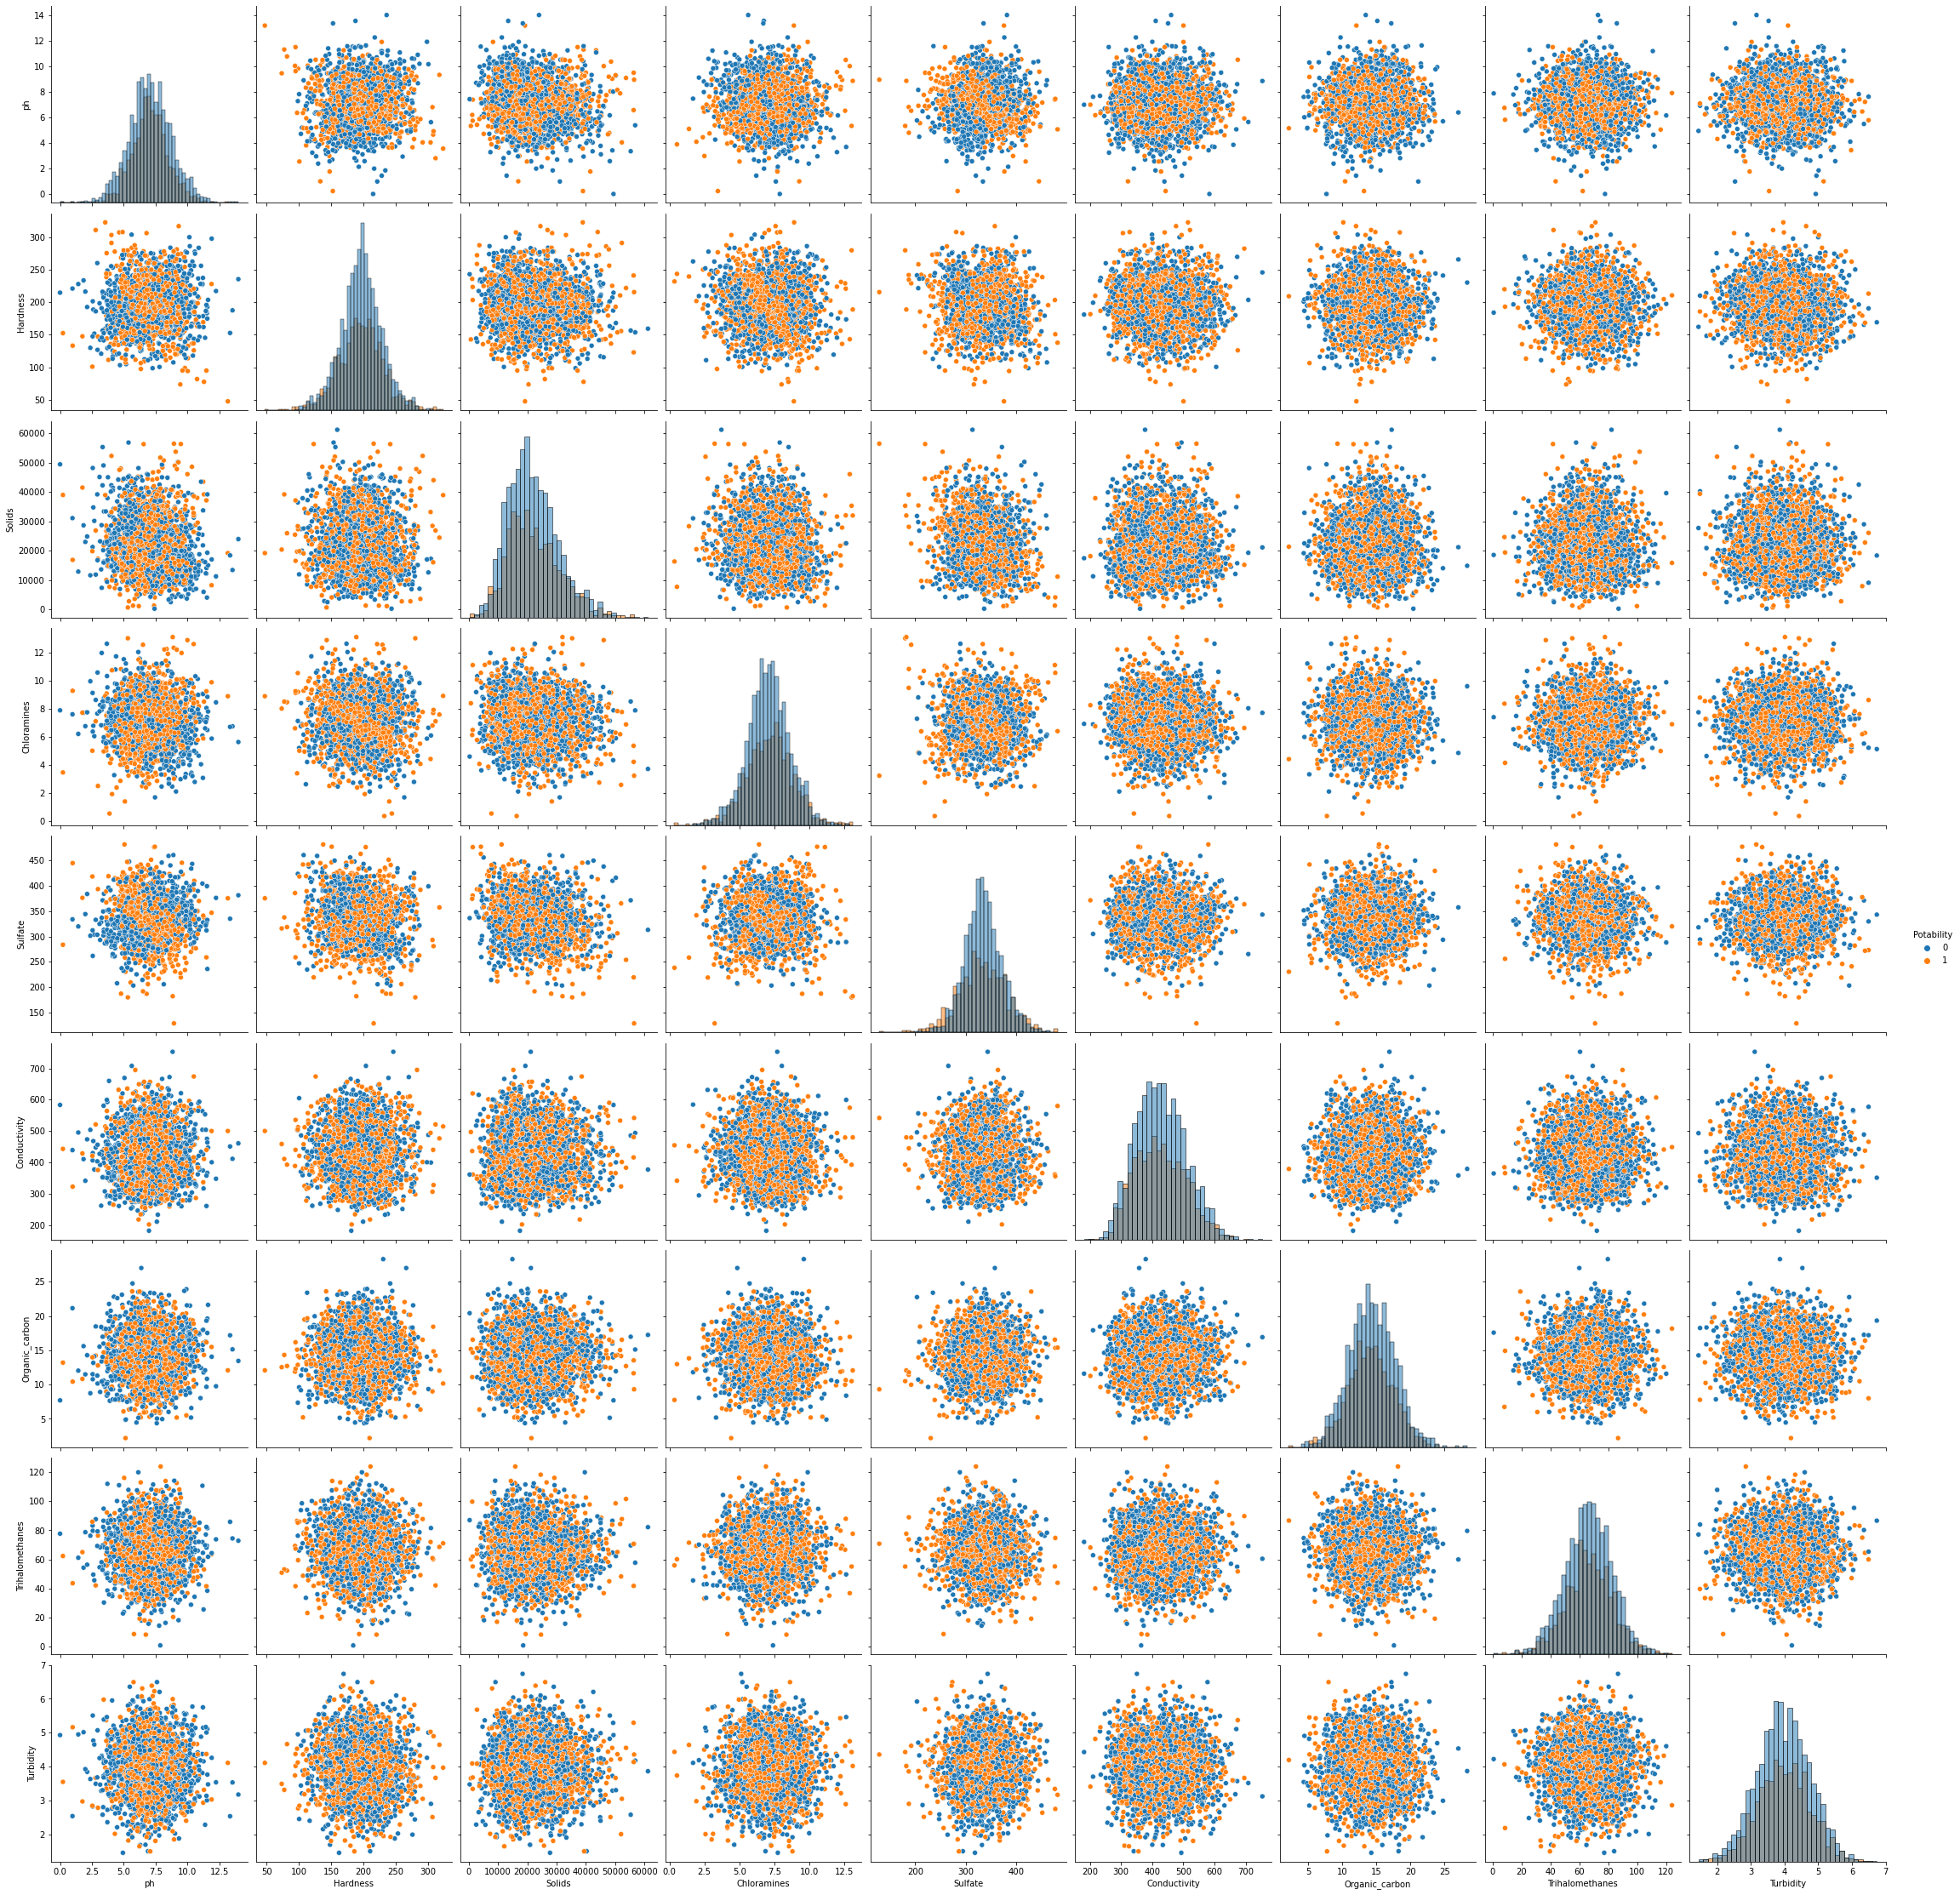

In [19]:
sns.pairplot(agua, diag_kind='hist', height=3.5, hue='Potability')

### Gráfica 3

Histograma para identificación de la densidad de ocurrencias

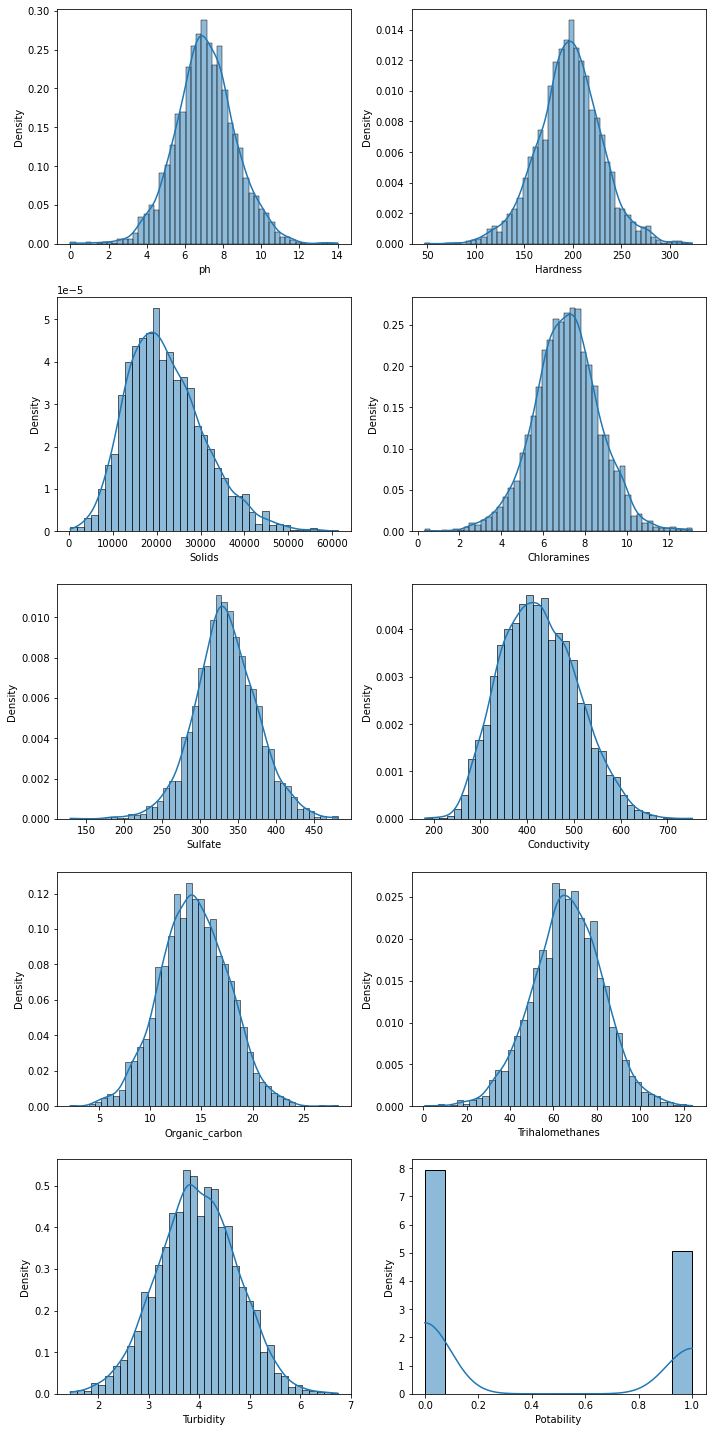

In [20]:
rows = 5
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 20))
col = agua.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.histplot(agua[col[index]], ax=ax[i][j], kde=True, stat='density')
        index += 1

plt.tight_layout()

### Gráfica 4

Correlación entre las características del dataset

<AxesSubplot:>

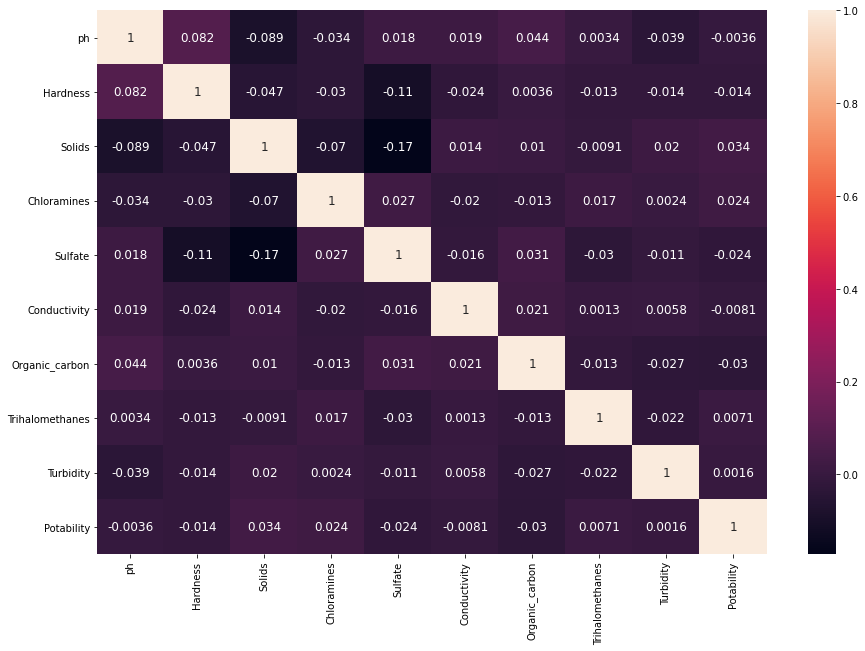

In [21]:
m_corr = agua.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(m_corr, annot=True, annot_kws={'size': 12}, cbar=True)

In [22]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])   
    df = pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
    return df

In [23]:
threshold = 0.50
corr_value = getCorrelatedFeature(m_corr['Potability'], threshold)
corr_value

Corr Value
Potability         1.0

### Gráfica 5

Diagrama de cajas para observar los conjuntos de datos teniendo en cuenta la característica de Potabilidad

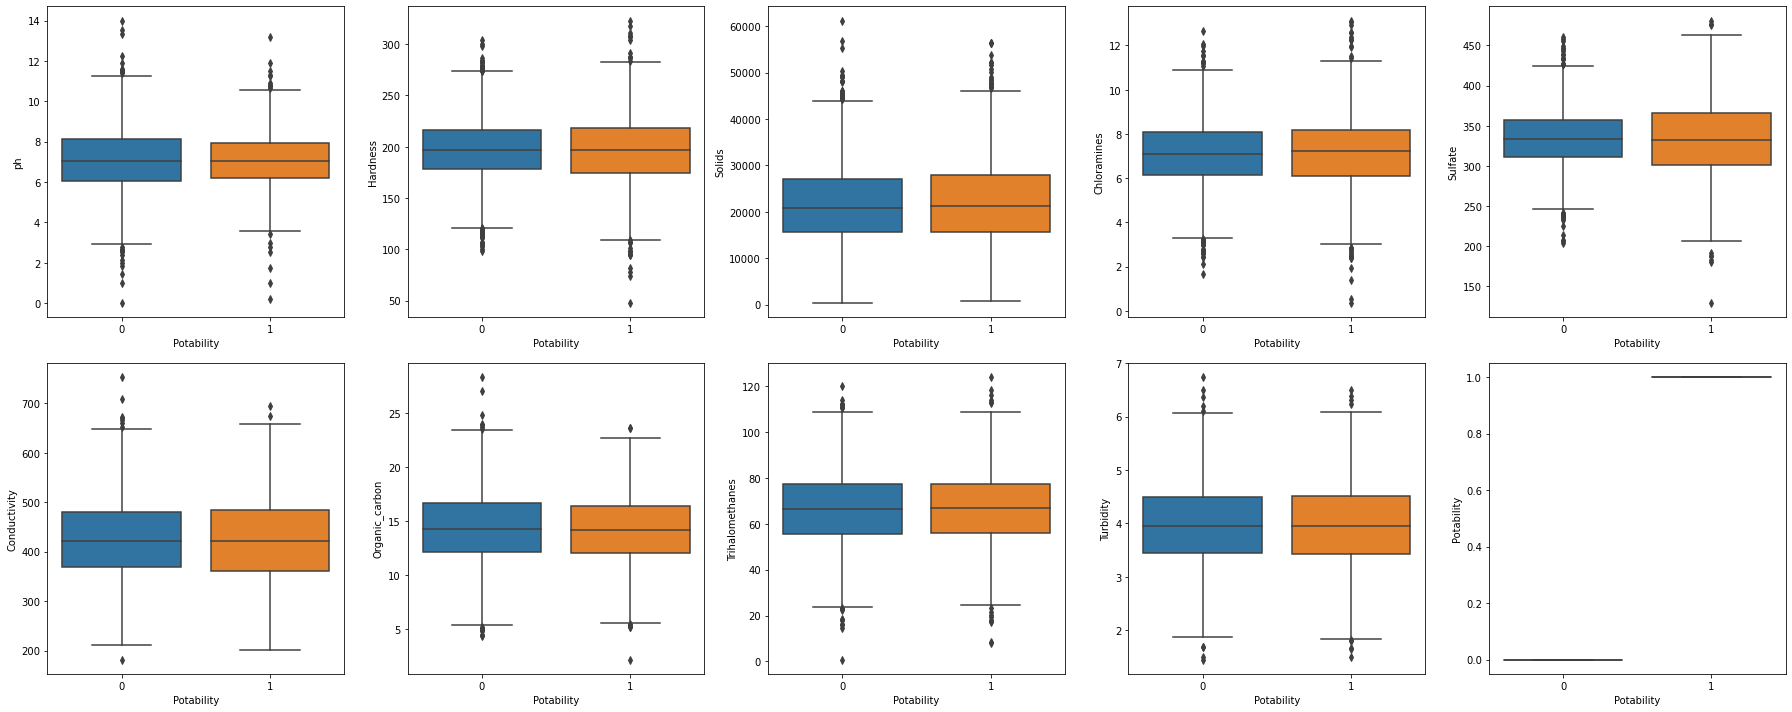

In [24]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 10))
col = agua.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.boxplot(x='Potability', y=agua[col[index]], data=agua, ax=ax[i][j])
        index += 1

plt.tight_layout()

### Gráfica 6

Diagrama de barras para identificación de ocurrencias de cada caracteristica agrupadas por su estado de potabilidad

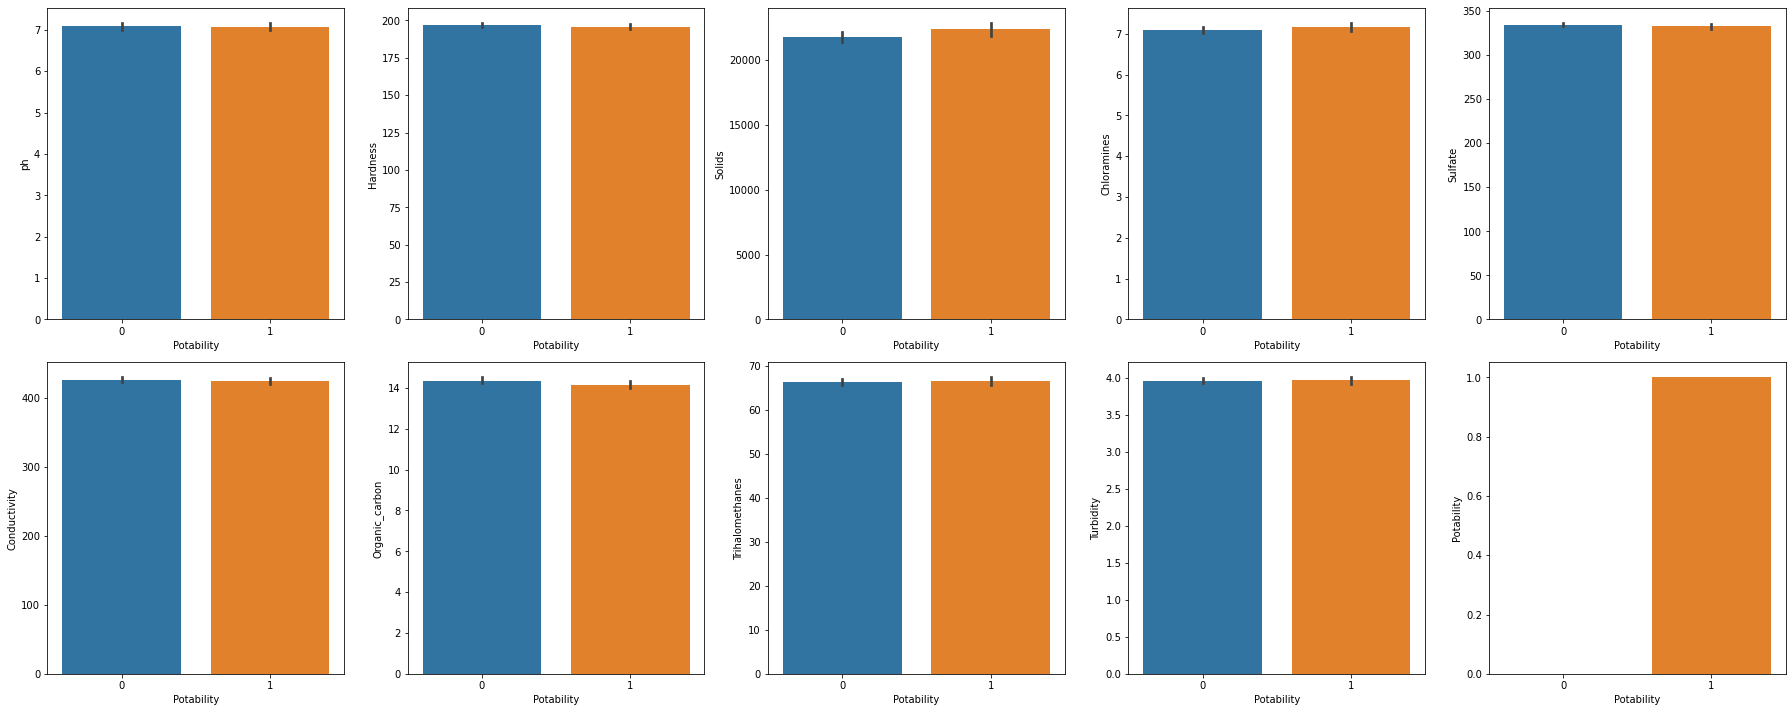

In [25]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 10))
col = agua.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.barplot(x='Potability', y=agua[col[index]], data=agua, ax=ax[i][j])
        index += 1

plt.tight_layout()

### Gráfica 7

Diagrama tipo Violin para agrupamiento de características segun su potabilidad e identificación de cuartiles por grupo

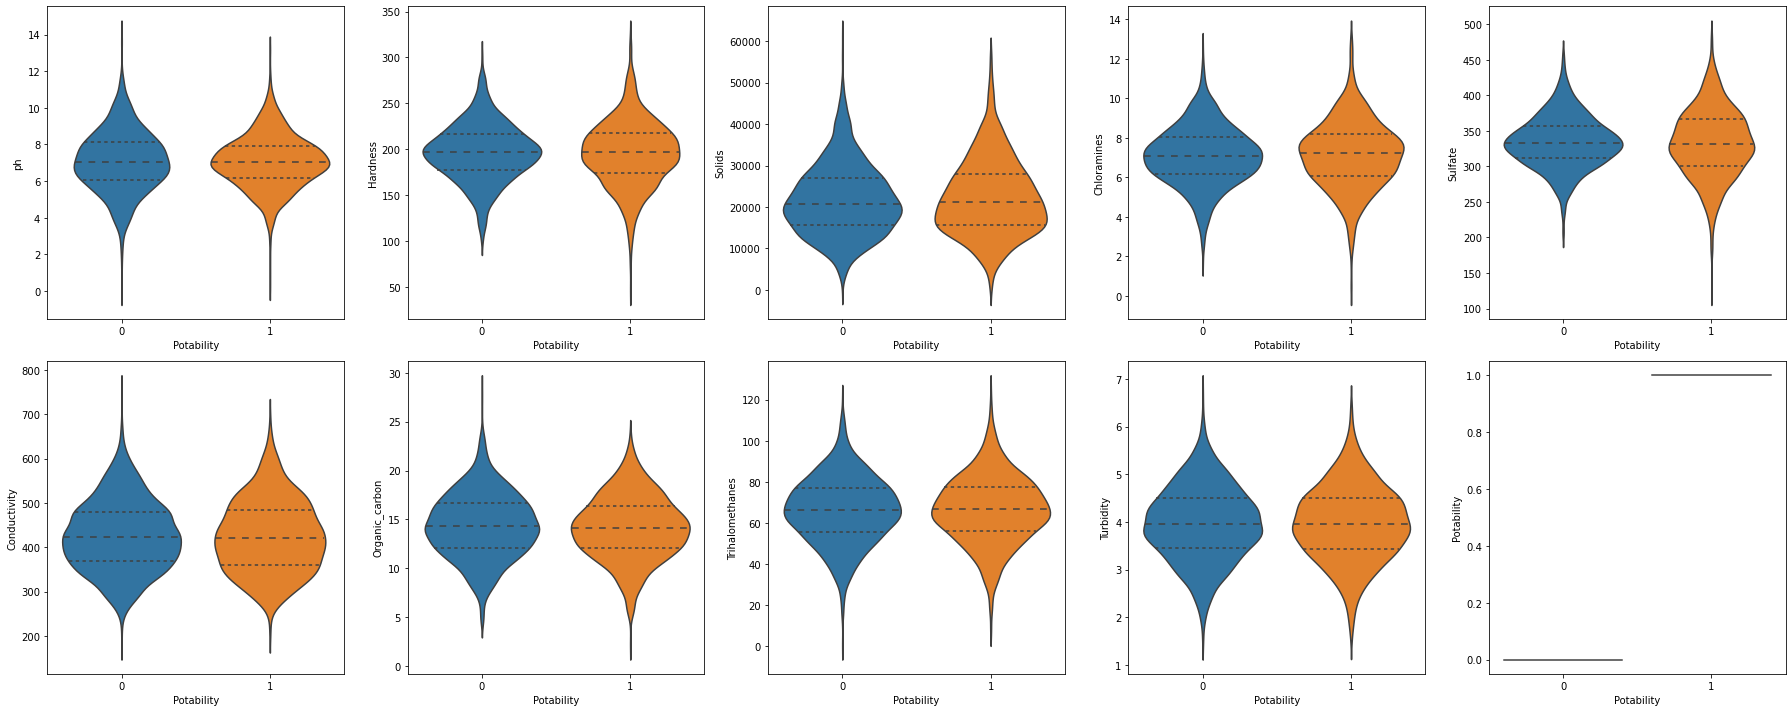

In [26]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 10))
col = agua.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.violinplot(x='Potability', y=agua[col[index]], data=agua, inner='quartile', ax=ax[i][j])
        index += 1

plt.tight_layout()

### Gráfica 8

Diagrama tipo Violin dividido para agrupamiento de características segun su potabilidad e identificación de cuartiles por grupo

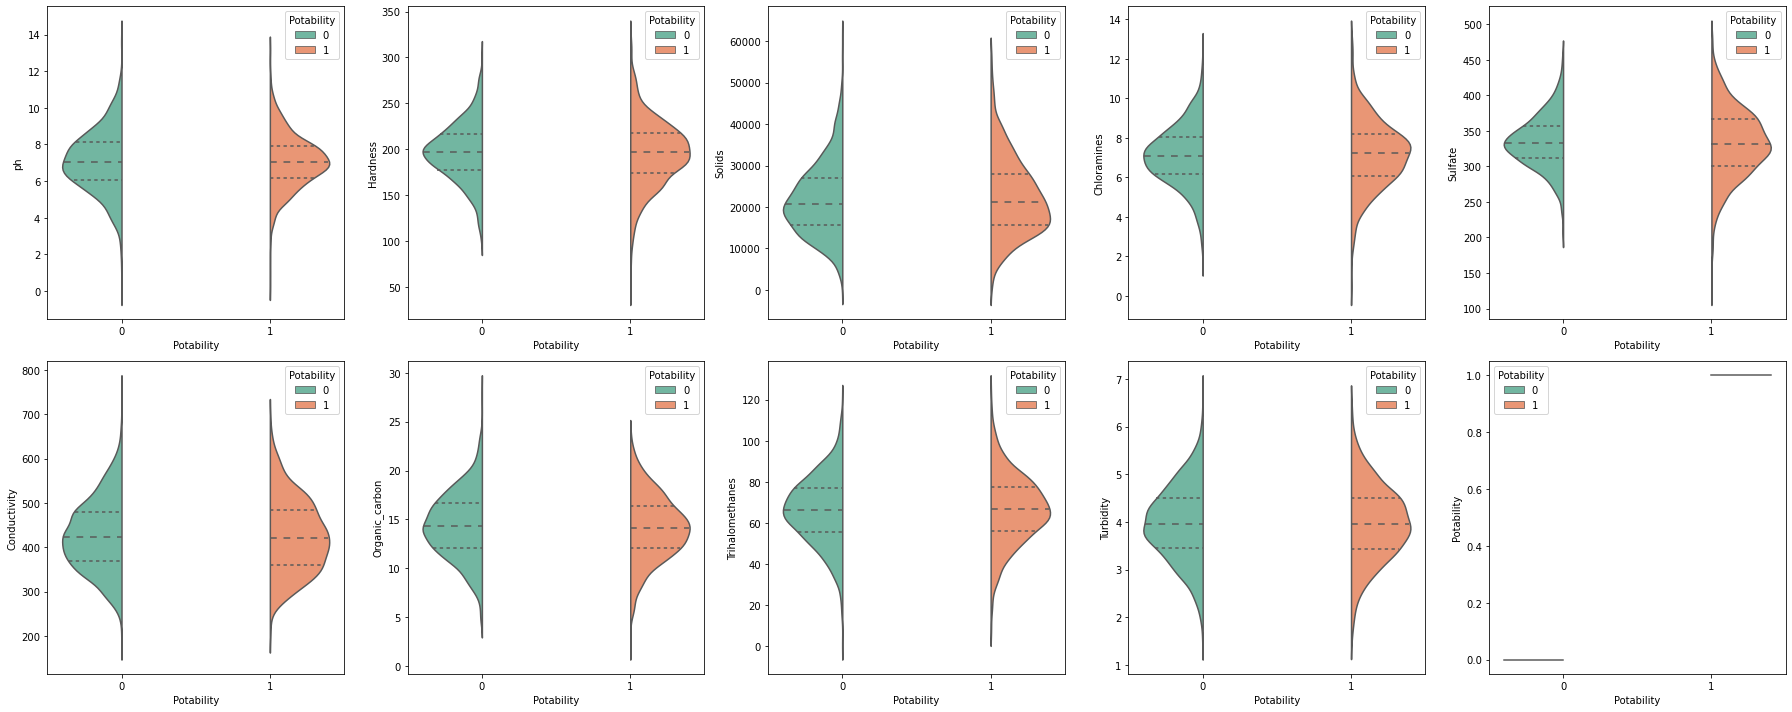

In [27]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 10))
col = agua.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.violinplot(x='Potability', y=agua[col[index]], hue='Potability', data=agua, palette="Set2", split=True, inner='quartile', ax=ax[i][j])
        index += 1

plt.tight_layout()

## Tratamiento de los datos nulos

Luego de analizar los porcentajes que representan los datos nulos dentro de las caracteristicas del dataset, se ha decidio imputar los datos y descartar la opción de eliminar los registros NaN. También apoyandonos con la gráfica 3 de la sección de **Graficar la data**, hemos determinado que no podemos aplicar un imputación tomando relaciones con otras features, ya que sus relaciones presentan indices muy bajos. Tampoco podemos imputar los datos con métodos estadisticos como `mean()`, `median()` o `mode()` dentro de la clasificación de la potabilidad por caracteristicas, puesto que esto sesgaría las columnas hacía un solo valor, alterando significativamente los datos.

La solución que se ofrece a continuación, es imputar datos aleatorios de tipo flotante dentro del rango min y max que ofrece el reporte estadistico de `.describe()` para cada feature. Es importante resaltar que esta solución no esta excenta de evitar que se inclinen las ocurrencias imputadas a un solo valor pues son valores aleatorios los que se generan.

In [ ]:
'''
def imput_dat(cols):
    data = cols[0]
    potability = cols[1]
    if pd.isnull(data):
        if potability == 0:
            return agua[agua['Potability']==0][data].mean()
        elif potability == 1:
            return agua[agua['Potability']==1][data].mean()
    else:
        return data
'''

In [28]:
def impute_ph(cols):
    ph = cols[0]
    if pd.isnull(ph):
        return random.uniform(0, 14)
    else:
        return ph

In [ ]:
#agua['ph'] = agua['ph'].dropna()

In [29]:
agua['ph'] = agua[['ph']].apply(impute_ph, axis=1)

In [30]:
agua['Sulfate'] = agua['Sulfate'].replace(np.nan, random.uniform(129, 481))

In [31]:
agua['Trihalomethanes'] = agua['Trihalomethanes'].fillna(random.uniform(1, 124))

In [32]:
agua.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.059998   196.369496  22014.092526     7.122277   337.492697   
std       2.118534    32.879761   8768.570828     1.583085    36.748295   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       5.953510   176.850538  15666.690297     6.127421   317.094638   
50%       7.037422   196.967627  20927.833607     7.130299   348.925970   
75%       8.205544   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.692726     3.966786     0.390110  
std       80.824064        3.308162        15.823362     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        67.623691     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

### Gráfica 9

Mapa de calor para representación gráfica de datos nulos dentro del dataset

<AxesSubplot:>

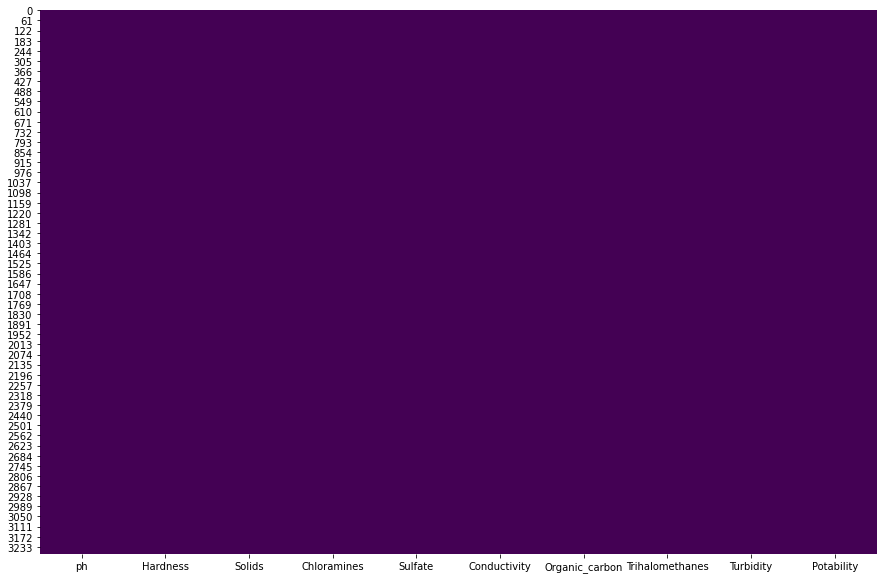

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(agua.isna(), cbar=False, cmap='viridis')

### Gráfica 10

Histograma para caracteristicas que han sido modificadas

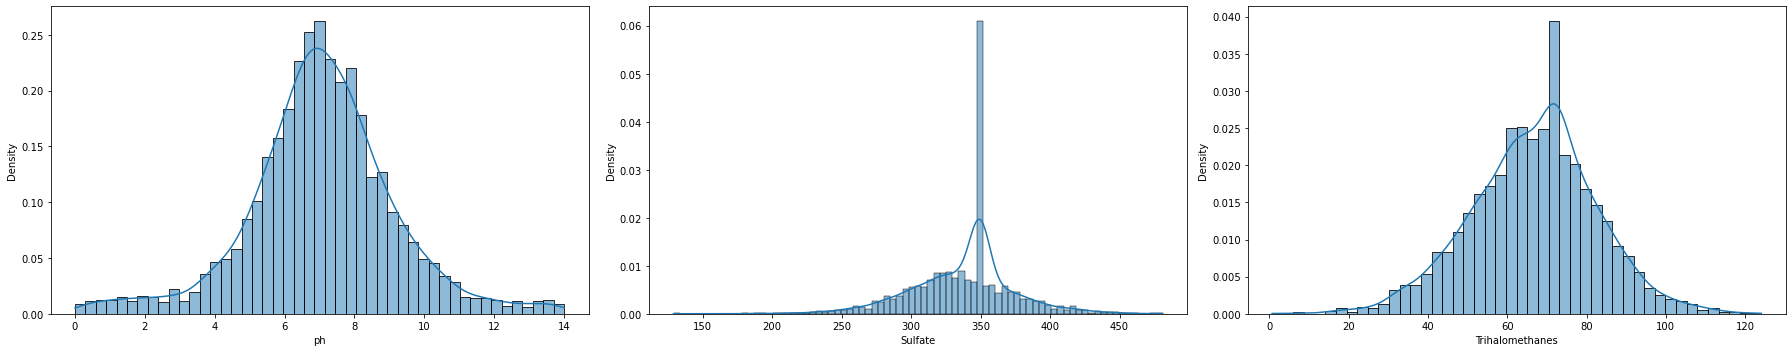

In [34]:
cols = 3

fig, ax = plt.subplots(ncols=cols, figsize=(25, 5))
col = ['ph', 'Sulfate', 'Trihalomethanes']
index = 0

for i in range(cols):
    sns.histplot(agua[col[index]], ax=ax[i], kde=True, stat='density')
    index += 1

plt.tight_layout()

## Separar la data

In [35]:
X = agua.drop(columns='Potability')
Y = agua['Potability']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5, stratify=Y)

In [36]:
x_train.shape

(2293, 9)

In [37]:
y_train.shape

(2293,)

In [38]:
x_test.shape

(983, 9)

In [39]:
y_test.shape

(983,)

## Modelo de Regresión Logística

### Creación del modelo

In [40]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [41]:
y_pred = lr.predict(x_test)

In [42]:
print(f'Accuracy: {(accuracy_score(y_test, y_pred))*100}%')

Accuracy: 61.03763987792472%


In [43]:
print(f'Precisión por Regresión Logistica {(lr.score(x_train, y_train)) * 100}%')
print(f'Error absoluto medio: {(mean_absolute_error(y_test, y_pred)) * 100}%')
print(f'Error medio cuadrado {(mean_squared_error(y_test, y_pred)) * 100}%')
print(f'Desviación de la raíz cuadrada media {(np.sqrt(mean_squared_error(y_test, y_pred))) * 100}%')
print(f'Score predict train {(r2_score(y_train, lr.predict(x_train))) * 100}%')
print(f'Score predict test {(r2_score(y_test, lr.predict(x_test))) * 100}%')

Precisión por Regresión Logistica 60.968163977322284%
Error absoluto medio: 38.96236012207528%
Error medio cuadrado 38.96236012207528%
Desviación de la raíz cuadrada media 62.41983668840801%
Score predict train -64.02002861230334%
Score predict test -63.833333333333385%


In [44]:
print(f'Precision Score: {(precision_score(y_test, y_pred)*100)}%')

Precision Score: 0.0%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       1.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.81      0.50      0.38       983
weighted avg       0.76      0.61      0.46       983



In [47]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



### Gráfica 11

Matriz de confusión (valores predichos, valores reales)

Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

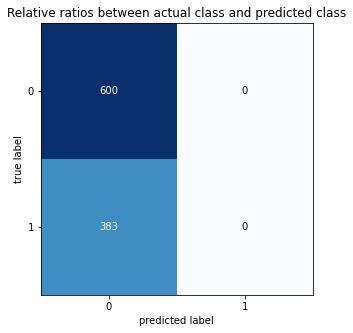

In [48]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt_cm(conf_mat=cm, figsize=(5, 5))
plt.title('Relative ratios between actual class and predicted class')

## Modelo de Árbol de Decisión de Clasificación

### Gráfica 12

Elbow Method, profundidad con mejor acertabilidad

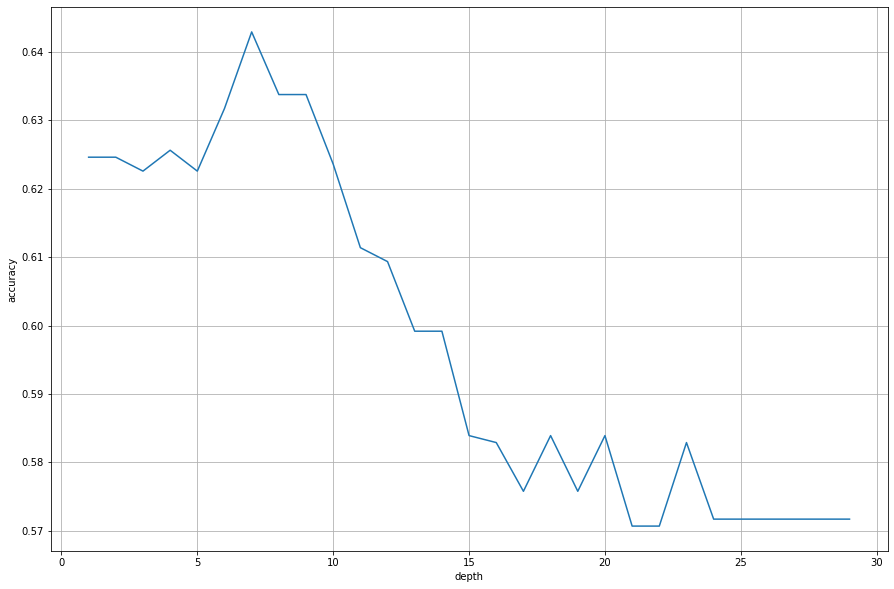

In [98]:
max_depth_lista = list(range(1, 30))

accuracy = []

for depth in max_depth_lista:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtc.fit(x_train, y_train)
    score = dtc.score(x_test, y_test)
    accuracy.append(score)

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

### Creción del modelo

In [51]:
dtc = DecisionTreeClassifier(max_depth=7, random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [52]:
y_pred = dtc.predict(x_test)

In [53]:
print(f'Accuracy: {(accuracy_score(y_pred, y_test))*100}%')
print(f'Score Train: {(dtc.score(x_train, y_train))*100}%')
print(f'Score Test: {(dtc.score(x_test, y_test))*100}%')

Accuracy: 64.29298067141403%
Score Train: 70.78063672045354%
Score Test: 64.29298067141403%


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76       600
           1       0.61      0.23      0.34       383

    accuracy                           0.64       983
   macro avg       0.63      0.57      0.55       983
weighted avg       0.63      0.64      0.59       983



In [55]:
print(f'Precision Score: {precision_score(y_test, y_pred)}')

Precision Score: 0.6095890410958904


In [56]:
importances = pd.DataFrame({'feature':x_train.columns, 'importance':np.round(dtc.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=True)
importances

feature  importance
6   Organic_carbon       0.011
7  Trihalomethanes       0.029
8        Turbidity       0.029
5     Conductivity       0.065
2           Solids       0.087
3      Chloramines       0.118
1         Hardness       0.162
0               ph       0.237
4          Sulfate       0.261

### Gráfica 13

Matriz de confusión

Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

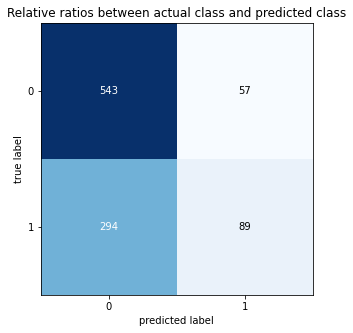

In [57]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt_cm(conf_mat=cm, figsize=(5, 5))
plt.title('Relative ratios between actual class and predicted class')

### Gráfica 14

Árbol Generado

In [58]:
dot_data = export_graphviz(dtc, feature_names=agua.columns[:-1].values, class_names=agua.columns)
graph = graph_from_dot_data(dot_data)
graph.write_png('../Z-IMG/SC/tree_agua.png')

True

![tree](..//Z-IMG/SC/tree_agua.png)

## Modelo de SVM

### Construcción del modelo

In [59]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [60]:
y_pred = svm.predict(x_test)

In [61]:
print(f'Accuracy: {(accuracy_score(y_pred, y_test))*100}%')
print(f'Score Train: {(svm.score(x_train, y_train))*100}%')
print(f'Score Test: {(svm.score(x_test, y_test))*100}%')

Accuracy: 61.03763987792472%
Score Train: 60.968163977322284%
Score Test: 61.03763987792472%


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
print(f'Precision Score: {precision_score(y_test, y_pred)}')

Precision Score: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gráfica 15

Matrix de confusion

Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

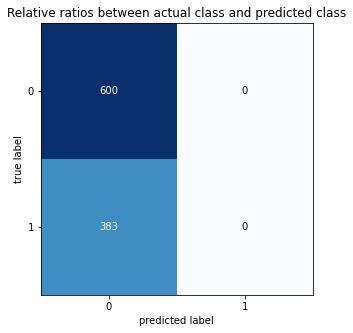

In [64]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt_cm(conf_mat=cm, figsize=(5, 5))
plt.title('Relative ratios between actual class and predicted class')

## Modelo de KNeighborgs

### Gráfica 16 

Elbow Method

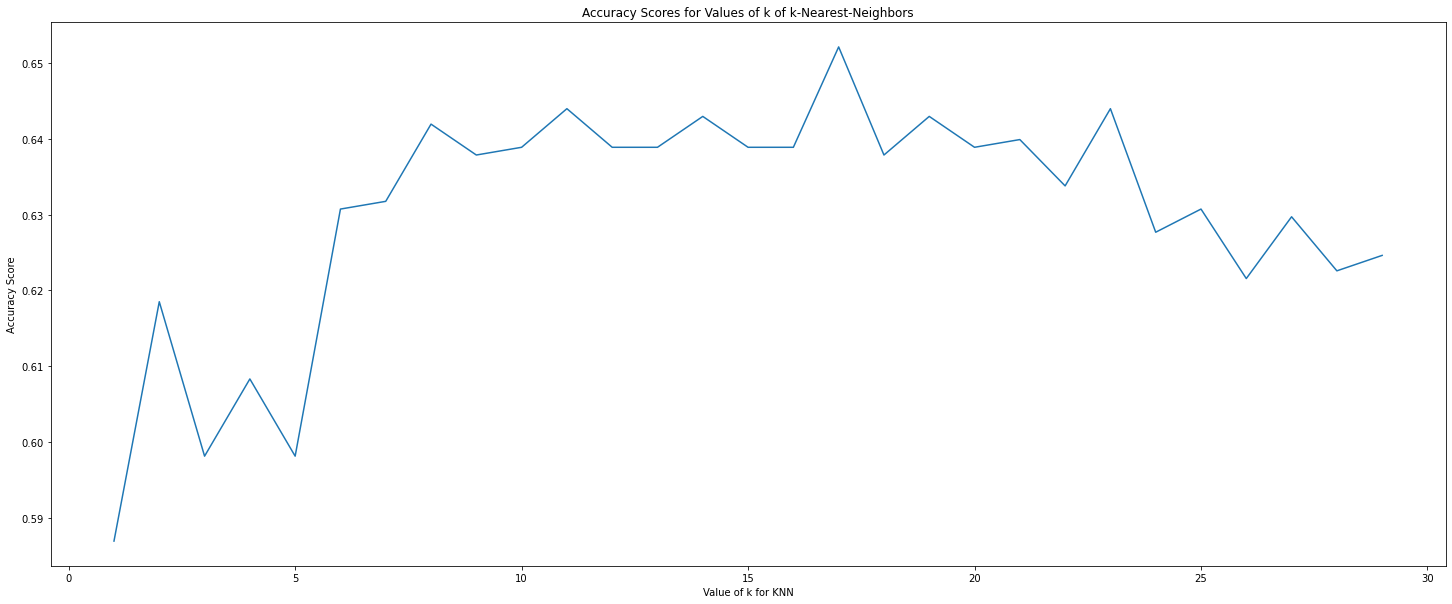

In [100]:
k_range = list(range(1, 30))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(25, 10))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

### Crear Modelo

In [101]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [102]:
y_pred = knn.predict(x_test)

In [103]:
print(f'Accuracy: {(accuracy_score(y_test, y_pred)*100)}%')

Accuracy: 65.20854526958291%


In [104]:
print(f'Precisión por Árbol de Decisión clasificatorio: {knn.score(x_train, y_train)*100}%')
print(f'Error absoluto medio: {mean_absolute_error(y_test, y_pred)}')
print(f'Error medio cuadrado: {mean_squared_error(y_test, y_pred)}')
print(f'Desviación de la raíz cuadrada media: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Score predict train {r2_score(y_train, knn.predict(x_train))}')
print(f'Score predict test {r2_score(y_test, knn.predict(x_test))}')

Precisión por Árbol de Decisión clasificatorio: 68.9925861317052%
Error absoluto medio: 0.34791454730417093
Error medio cuadrado: 0.34791454730417093
Desviación de la raíz cuadrada media: 0.5898428157604116
Score predict train -0.3029970988083539
Score predict test -0.46295039164490914


In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.90      0.76       600
         1.0       0.62      0.27      0.38       383

    accuracy                           0.65       983
   macro avg       0.64      0.58      0.57       983
weighted avg       0.64      0.65      0.61       983



In [106]:
print(f'Precision score {precision_score(y_test, y_pred)}')

Precision score 0.6242424242424243


### Gráfica 17

Matriz de Confusión

Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

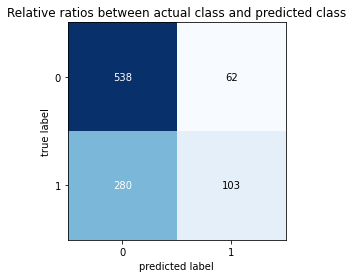

In [107]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt_cm(conf_mat=cm)
plt.title('Relative ratios between actual class and predicted class')

## Comparacion de precisión entre los modelos

| Modelo de ML             | Score Train | Accuracy | Precision Score |
| ------------------------ | ----------- | -------- | --------------- |
| Logistic Regression      |    60.96    |   61.03  |        0        |
| Decision Tree Classifier |    70.78    |   64.29  |      60.95      |
| Support Vector Machine   |    60.96    |   61.03  |        0        |
| KNeighbors Classifier    |    68.99    |   65.20  |      62.42      |

## E

<AxesSubplot:ylabel='Potability'>

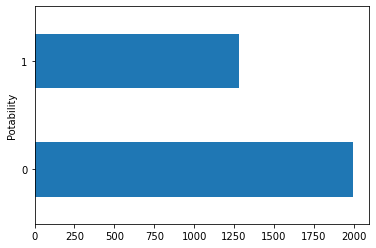

In [65]:
agua.groupby('Potability').size().plot.barh()

In [66]:
x = np.array(agua.drop(columns=['Potability']))
y = np.array(agua['Potability'])

In [67]:
from mpl_toolkits.mplot3d import Axes3D

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:838: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:840: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


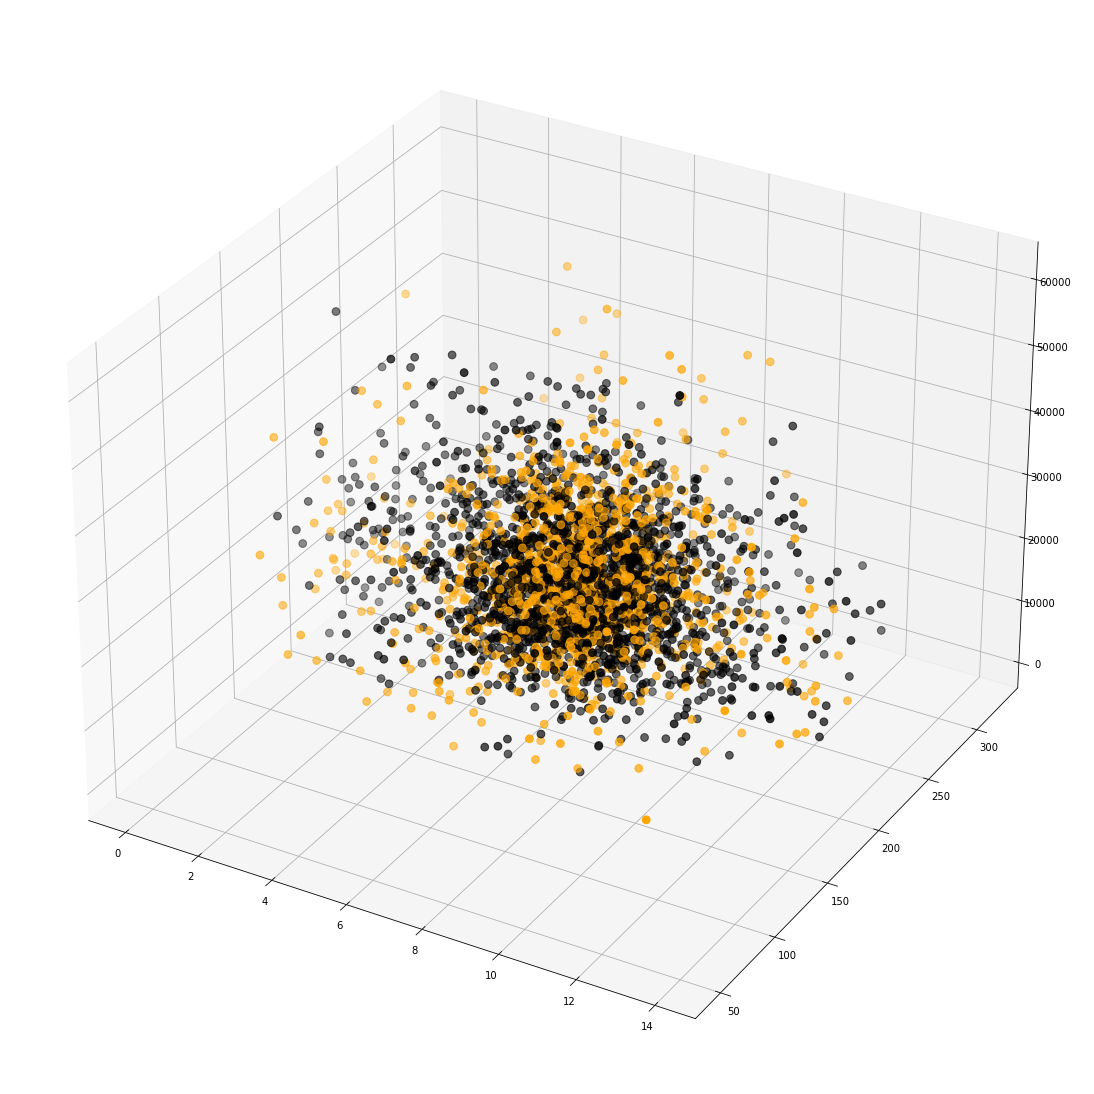

In [78]:
colores = ['black', 'orange', 'blue','orange','green','blue','cyan','yellow','red','black','pink','brown','purple']
asignarColores = []

for row in y:
    asignarColores.append(colores[row])

fig = plt.figure(figsize=(25,15))
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], x[:, 3], c=asignarColores, s=60)

In [79]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [80]:
x = agua.drop(columns='Potability')

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [81]:
SSE = []
index = range(1, 100)

for i in index:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

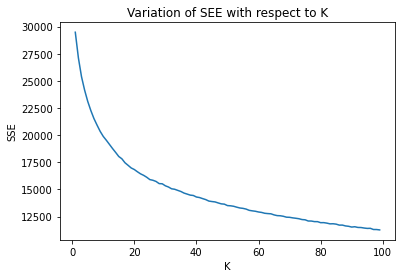

In [82]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Variation of SEE with respect to K')
plt.show()

## E2

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
sclar = MinMaxScaler()

In [85]:
agua.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  8.905353  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  349.366854    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  349.366854    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [87]:
agua[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']] = sclar.fit_transform(agua[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']])
agua.describe()

ph     Hardness       Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000  3276.000000  3276.000000  3276.000000   
mean      0.504286     0.540231     0.356173     0.529963     0.592257   
std       0.151324     0.119263     0.143968     0.123921     0.104389   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.425251     0.469432     0.251957     0.452088     0.534313   
50%       0.502673     0.542401     0.338338     0.530591     0.624735   
75%       0.586110     0.613857     0.443498     0.607662     0.628882   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean       0.427940        0.463026         0.535078     0.475853     0.390110  
std        0.141336        0.126750         0.128372     0.147548     0.487849  
min        0.000000        0.000000         0.000000     0.000000     0.000000  
25%        0.322196        0.378000         0.453584     0.376198     0.000000  
50%        0.420386        0.460473         0.542630     0.473630     0.000000  
75%        0.525145        0.550102         0.615994     0.576729     1.000000  
max        1.000000        1.000000         1.000000     1.000000     1.000000

In [86]:
def impute_data(cols):
    data = cols[0]
    if pd.isnull(data):
        return random.random()
    else:
        return data

In [88]:
labels = ['ph', 'Sulfate', 'Trihalomethanes']

for l in labels:
    agua[l] = agua[[l]].apply(impute_data, axis=1)

In [89]:
agua.describe()

ph     Hardness       Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000  3276.000000  3276.000000  3276.000000   
mean      0.504286     0.540231     0.356173     0.529963     0.592257   
std       0.151324     0.119263     0.143968     0.123921     0.104389   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.425251     0.469432     0.251957     0.452088     0.534313   
50%       0.502673     0.542401     0.338338     0.530591     0.624735   
75%       0.586110     0.613857     0.443498     0.607662     0.628882   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean       0.427940        0.463026         0.535078     0.475853     0.390110  
std        0.141336        0.126750         0.128372     0.147548     0.487849  
min        0.000000        0.000000         0.000000     0.000000     0.000000  
25%        0.322196        0.378000         0.453584     0.376198     0.000000  
50%        0.420386        0.460473         0.542630     0.473630     0.000000  
75%        0.525145        0.550102         0.615994     0.576729     1.000000  
max        1.000000        1.000000         1.000000     1.000000     1.000000

In [90]:
X = agua.drop(columns='Potability')
Y = agua['Potability']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5, stratify=Y)

In [91]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [92]:
y_pred = lr.predict(x_test)

In [93]:
print(f'Accuracy: {(accuracy_score(y_test, y_pred))*100}%')

Accuracy: 61.13936927772126%


In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       600
         1.0       1.00      0.00      0.01       383

    accuracy                           0.61       983
   macro avg       0.81      0.50      0.38       983
weighted avg       0.76      0.61      0.47       983



Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

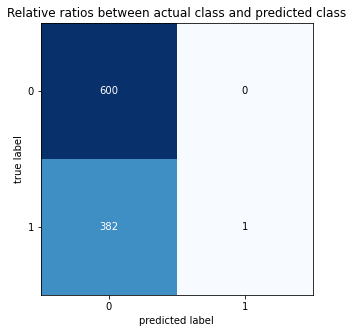

In [95]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt_cm(conf_mat=cm, figsize=(5, 5))
plt.title('Relative ratios between actual class and predicted class')